# Wigner-Ville Distribution

In [1]:
# using Plots
# plotlyjs()
using PyPlot
plt = PyPlot

PyPlot

For the conventient, we set some background parameter.

In [2]:
Fs = 100;
N = 100;
T = 1/Fs;
t = T:T:N*T;

## Interpolation

In [3]:
function interp_da(x)
  N = length(x)::Int;
  N_over_2 = convert(Int, N/2);

  x_fft = fft(x);
  y_fft = zeros(Complex{Float64}, 2*N);
  y_fft[1:N_over_2-1] = 2*x_fft[1:N_over_2-1];
  y_fft[3*N_over_2+1:2*N] = 2*x_fft[N_over_2+1:N];
  y_fft[N_over_2] = x_fft[N_over_2];
  y_fft[3*N_over_2] = x_fft[N_over_2];

  y = ifft(y_fft);
  return y
end

interp_da (generic function with 1 method)

## Hilbert Transform

In [4]:
function Hilbert_da(x)
  N = length(x);
  x_fft = fft(x);
  N_over_2 = convert(Int, N/2);
  x_fft[N_over_2:end] = 0;
  x_fft[1:N_over_2] = 2*x_fft[1:N_over_2];
  x1 = ifft(x_fft);
  return x1
end

Hilbert_da (generic function with 1 method)

## Wigner-Ville Distribution
### Version 1
With complete circular convolution.

In [5]:
function WVD_da2(x)
  N = length(x)::Int;
  y = interp_da(x);
  y = Hilbert_da(y);
  yy = [y;y;y];
  W = zeros(Complex{Float64}, 2*N,N);
  for n = 1:N
    for p = 0:(2*N-1)
      W[p+1,n] = yy[2*n+p-N+2*N] * conj(yy[2*n-p+N+2*N]);
    end
  end
  W = W[N+1:end,:];
  WW = real(fft(W,1));
  return WW
end

WVD_da2 (generic function with 1 method)

### Version 2
With incomplete circular convolution.

In [6]:
function WVD_da3(x)
  N = length(x)::Int;
  y = interp_da(x);
  y = Hilbert_da(y);
  yy = [y;y;y];
  yy[1:2*N] = 0;
  yy[4*N+1:end] = 0;
  W = zeros(Complex{Float64}, 2*N,N);
  for n = 1:N
    for p = 0:(2*N-1)
      W[p+1,n] = yy[2*n+p-N+2*N] * conj(yy[2*n-p+N+2*N]);
    end
  end
  W = W[N+1:end,:];
  WW = real(fft(W,1));
  return WW
end

WVD_da3 (generic function with 1 method)

### Numerical Experiment
First signal is a 10Hz sine function. Second signal is a chirp signal with a 10Hz sine function.
$$x_1 = \sin(2\pi\times 10t),\quad x_2 = \sin(2\pi\times 25t^2) + \sin(2\pi\times 10t).$$

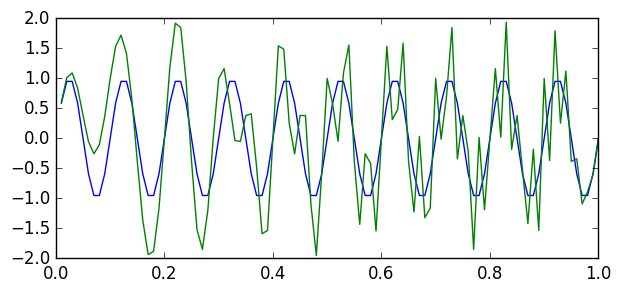

In [19]:
fig = plt.figure("pyplot_subplot",figsize=(7,3))
plt.subplot(111);
x1 = sin(2*pi*10*t);
x2 = sin(2*pi*25*t.^2) + sin(2*pi*10*t);
plt.plot(t,x1);
plt.plot(t,x2);

In [17]:
W1_1 = WVD_da2(x1);
W1_2 = WVD_da3(x1);
W2_1 = WVD_da2(x2);
W2_2 = WVD_da3(x2);

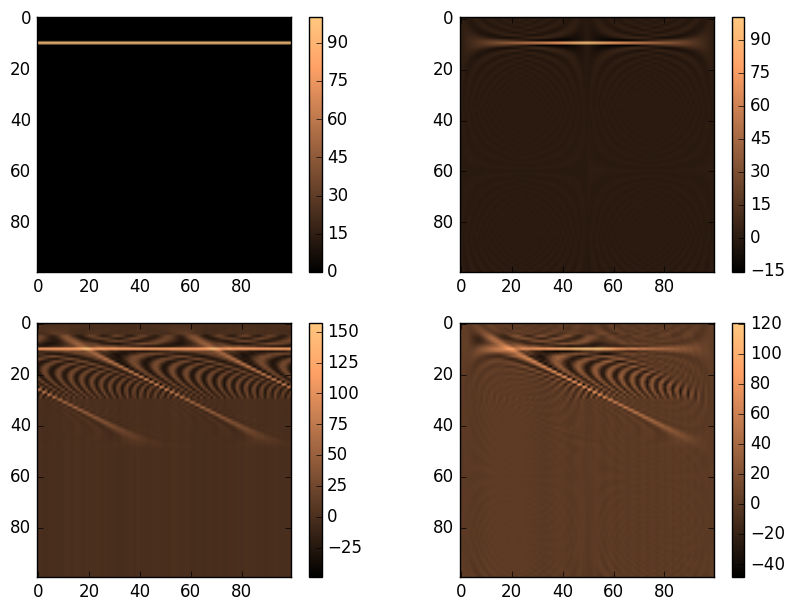

In [21]:
fig = plt.figure("pyplot_subplot",figsize=(10,7));
plt.subplot(221);
plt.imshow(W1_1, cmap=ColorMap("copper"));
colorbar();
# ------------------------------ 
plt.subplot(222);
plt.imshow(W1_2, cmap=ColorMap("copper"));
colorbar();
# ------------------------------ 
plt.subplot(223);
plt.imshow(W2_1, cmap=ColorMap("copper"));
colorbar();
# ------------------------------ 
plt.subplot(224);
plt.imshow(W2_2, cmap=ColorMap("copper"));
colorbar();